<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 5
## 21-06-2023
#### Autor: Yañez $\lambda$, Joaquin

En esta tarea semanal se nos pedía el diseño de un filtro pasa alto de máxima planicidad, sin embargo además debe tener un cero de transferencia a una frecuencia específica, para esto se debe cumplir la siguiente plantilla prototipo:

<img src="./Fotos/Consigna.png"/> 

Lo primero que notamos es que a una frecuencia de $1rad/s$ se tiene una atenuación de aproximadamente $3dB$ por lo que el filtro será de tipo butterworth. Además se aprecia que la fase tiene un desarrollo de 270°, lo cual nos indica que habrá 3 polos en el sistema y por ende este será el orden del filtro.

Acontinuación se muestra el desarrollo teórico en papel del ejercicio.

In [1]:
from IPython.display import IFrame
IFrame("./TS5.pdf", width=800, height=800)

### Transformación de los polos

Es destacable como el filtro pasabajos prototipo calculado es de orden 3, pero no es como cualquier butter de orden 3, ya que se necesitan forzar los dos ceros de transeferencia, lo que provoca que aparezcan los dos ceros sobre el eje $j\omega$, estos se encuentran en un radio mayor al de los 3 polos. Sin embargo al aplicar el núcleo de transformación $p =\frac{1}{s}$ los polos no se mueven, ya que se encuentran en la circnferencia unitaria, pero aparece un cero en el origen y los dos ceros que ya se encontraban sobre el eje en un radio $>1$ se mapean sobre el eje tambip

## Simulación en python

En este caso se realizó casi todo el ejercicio en python, para ir corroborando los resultados obtenidos en el papel con la herramientas de simulación:


In [2]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, pretty_print_SOS

In [3]:
# Parámetros del enunciado
f0 = 300
f0z = 100

ep = (10**0.3 -1)**(1/2)
n = 3

#Cálculo del epsilon del filtro
print("ep² =", ep)

ep² = 0.9976283451109834


In [4]:
# Normalización de las frecuencias
norma_w = 2*np.pi*f0

w0 = 2*np.pi*f0/norma_w
w0z = 2*np.pi*f0z/norma_w

print("w0 =", w0)
print("w0z =", w0z)

w0 = 1.0
w0z = 0.33333333333333337


In [5]:
#Transformamos al filtro pasabajos prototipo
W0 = 1/w0
W0z = 1/w0z


print("W0 =", W0)
print("W0z =", W0z)

W0 = 1.0
W0z = 2.9999999999999996


Transferencia del pasabajos prototipo:


<IPython.core.display.Math object>

Transferencia del pasalto objetivo:


<IPython.core.display.Math object>

Como esto no es de mucha información es mejor seccionarla en transferencias de 2do orden:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

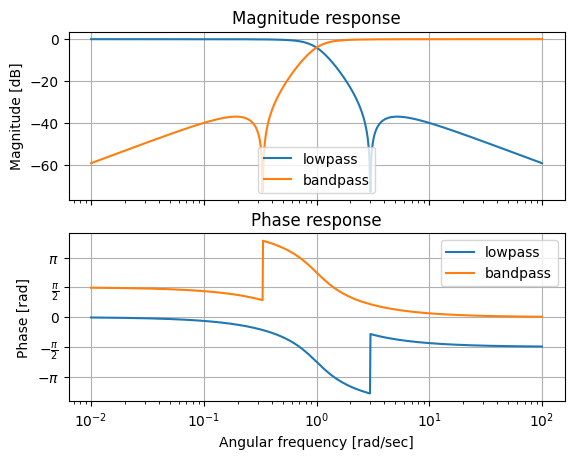

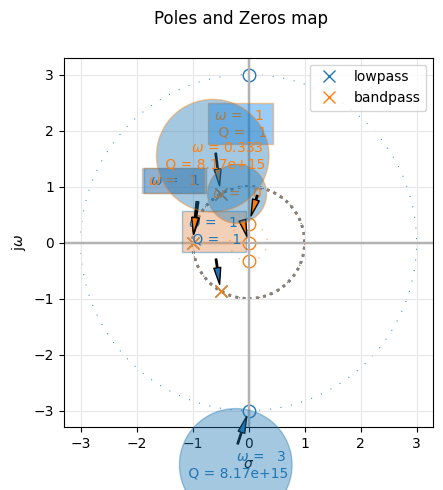

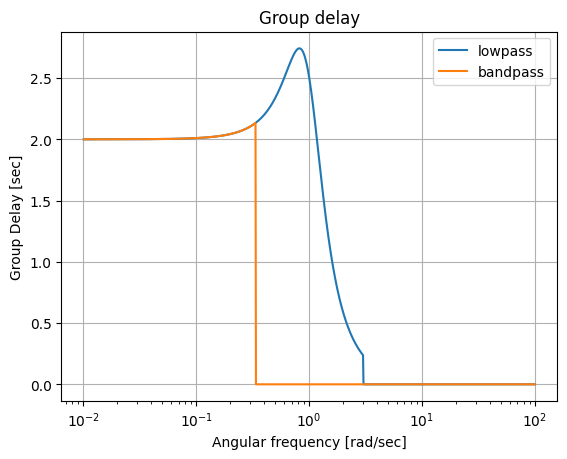

In [6]:
#Armado del prototipo pasabajos, recordamos que como el epsilon es casi igual a 1 usamos un butterworth y el orden
#sale directamente de la consigna
zlp, plp, klp = sig.buttap(n)

zlp = [0+W0z*1j, 0-W0z*1j] #Se fuerzan los dos ceros de transferemcia en las frecuencias indicadas
klp = 1/9 #Para que el filtro siga siendo de 0dB se debe modificar la ganancia

Nlp, Dlp = sig.zpk2tf(zlp, plp, klp)


tflp = TransferFunction( Nlp, Dlp )

print("Transferencia del pasabajos prototipo:")
pretty_print_lti(Nlp, Dlp)
#Plot del filtro butter
analyze_sys(tflp, sys_name='lowpass')


#Transformación del prototipo al filtro objetivo
Nhp, Dhp = sig.lp2hp(Nlp , Dlp)
tfhp = TransferFunction(Nhp, Dhp)

zhp, php, khp = sig.tf2zpk(Nhp, Dhp)
sos_hp = sig.zpk2sos(zhp, php, khp, analog=True)
sos_hp[sos_hp < 1e-6] = 0.0

print("Transferencia del pasalto objetivo:")
pretty_print_lti(Nhp, Dhp)

print("Como esto no es de mucha información es mejor seccionarla en transferencias de 2do orden:")
pretty_print_SOS(sos_hp)

pretty_print_SOS(sos_hp, mode='omegayq')

analyze_sys(tfhp, sys_name='bandpass')

Es interesante comparar los diagramas de polos y ceros del filtro objetivo y del filtro prototipo. Se observa claramente como los ceros del pasabajos se encuentran en una circunferecia mayor a la de los ceros del pasaalto, además vemos como el filtro objetivo solo tiene un cero en el origen y no 3 como un pasaaltos comun y corriente como ya se habia anticipado teoricamente.

### Implementación del filtro mediante el circuito propuesto

A continuación se realiza la implementación del circuito utilizando la siguiente estructura <img src="./Fotos/Circuito.png">

Para este caso se analizó la estructura y se llegó a la conclusión de que su transferencia es la siguiente:

\begin{equation}
T(s) = \frac{V_o}{V_i} = \frac{s^{2}+\frac{R_1-R_2}{R_1}\cdot \frac{1}{C^{2}RR_2}}{S^{2}+s\frac{1}{C R_1}+\frac{1}{C^{2}RR_2}}
\end{equation}

Ahora podemos igualar esta transferencia a la que nosotros necesitamos para poder conseguir el filtro deseado:

\begin{equation}
\frac{1}{CR_1} = \frac{\omega_0}{Q} = 1
\end{equation}

\begin{equation}
\frac{1}{C^{2}RR_2} = \omega_0^{2} = 1
\end{equation}

\begin{equation}
\frac{R_1-R_2}{R_1} = \frac{\omega_z^{2}}{\omega_0^{2}} = \frac{1}{9}
\end{equation}


De estas ecuaciones se define lo siguiente:

\begin{equation}
R_1 = \frac{1}{C} \hspace{1cm}    R_2 = \frac{8}{9} \cdot R_1 \hspace{1cm}    R = \frac{1}{C^{2}R_2}
\end{equation}

Si definimos $C = 1$ tenemos todos los componentes con el valor deseado, ahora se procede a realizar la simulación en LtSpice con los siguientes valores:

\begin{equation}
R_1 = 1 \hspace{1cm}    R_2 = \frac{8}{9} \hspace{1cm}    R = \frac{9}{8} \hspace{1cm} C = 1
\end{equation}

<img src="./Fotos/ciruitoActivado_esq.png"/>

<center>  Fig1. Esquemático del circuito a simular <strong>desnormalizado en frecuencia e impedancia</strong></center>

<img src="./Fotos/ciruitoActivado_out.png"/>

<center>  Fig2. Salida de la simulación </center>


## Comparación con la red propuesta por Schaumann

En el libro de Schaumann se propone el siguiente circuito:

<img src="./Fotos/Schaumann.png"/>
<center>  Fig3. Circuito propuesto por Schaumann </center>

Este circuito es MUY similar al que utilizamos para sintetizar el filtro, ambos se basan en la estructura del GIC, tomando la salida en el amplificador operacional para poder cargar impedancias y agregar diferentes etapas luego del circuito. Schaumann propone un levantamiento de impedancias, que le permiten modificar los ceros del sistema a su gusto y asi poder conseguir diferentes transferencias con el mismo circuito. Del libro se extrae que la transferencia del sistema es la siguiente:

\begin{equation}
T(s) = \frac{V_o}{V_i} = \frac{s^{2} \cdot (2a-c)+ s\frac{\omega_0}{Q} \cdot (2b-c)+c\omega_0^{2}}{S^{2}+s\frac{\omega_0}{Q}+\omega_0^{2}}
\end{equation}


Con esto podemos definir a, b y c para obtener la transferencia del filtro que nosotros deseamos, cabe destacar que $\omega_0^{2} = \frac{1}{RC}$. Igualando con la transferencia obtenida resulta lo siguiente:

\begin{equation}
R= \frac{1}{C} = 1 \hspace{1cm}    c = (\frac{1}{3})^{2} \hspace{1cm}    b = \frac{c}{2}  \hspace{1cm} a = \frac{c+1}{2}
\end{equation}


Se simularán ahora ambos circuitos con sus respectivos parámetros para poder comparar ambos resultados:
<img src="./Fotos/GicYActivado_esq.png"/>
<center>  Fig4. Esquemático de ambos circuitos analizados con sus respectivos parámetros </center>

<img src="./Fotos/comparacionGIC.png"/>
<center>  Fig5. Resultado de la simulación, en rojo el circuito inicial y en rojo el circuito de Schaumann </center>


Es facil apreciar que ambos circuitos son equivalentes, el circuito de Schaumann presenta la facilidad de que con la misma topología se pueden conseguir diferentes tipos de filtros, mientras que con el propuesto en el enunciado solo se pueden conseguir filtros de este estilo o pasaaltos comunes. Esto sin embargo se puede solucionar realizando diferentes levantamientos de impedancia para que en el numerador de la transferencia aparezcan los términos deseados.

## Conclusiones

Esta tarea fue de gran ayuda para poder comprender bien la utilización de las estructuras bicuadraticas. Además, fue grato trabajar con filtros "mixtos" ya que me llevo a tener que razonar como jugar con la transferencia para poder cumplir con los requisitos del enunciado. Otra vez, se comprobó la facilidad algebraica que presentan los filtros butter y la transformación pasabajos -> pasaaltos frente a otro tipo de filtros y transformaciones.